In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/TensorFlow/Emotions Detection/Emotion Data/emotion-labels-train.csv")
df_train

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [4]:
df_train["text"] = [i.lower() for i in df_train["text"].to_list()]
df_train

,text,label
0,just got back from seeing @garydelaney in burs...,joy
1,oh dear an evening of absolute hilarity i don'...,joy
2,been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : thank you so much, gloria! yo...",joy
4,i feel so blessed to work with the family that...,joy
...,...,...
3608,@vivienlloyd thank you so much! just home - st...,sadness
3609,just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@silkinside @tommyjoeratliff that's so pretty!...,sadness
3611,@bluesfestbyron second artist announcement loo...,sadness


<Axes: xlabel='label', ylabel='count'>

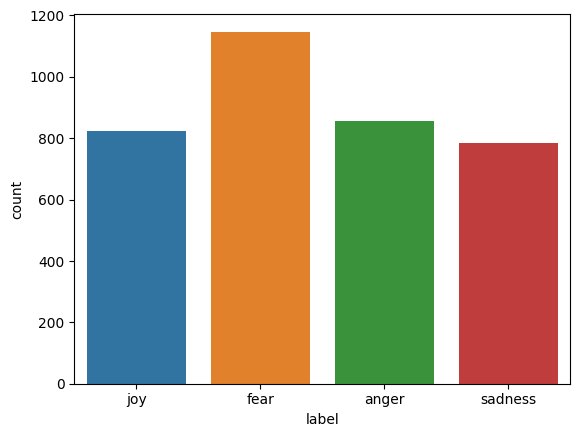

In [ ]:
sns.countplot(df_train, x = "label")

In [5]:
df_train["label"] = df_train["label"].astype("category")
df_train["label"] = df_train["label"].cat.codes

<Axes: xlabel='label', ylabel='count'>

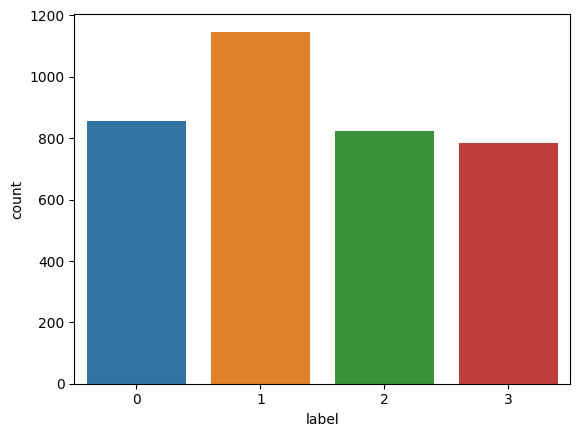

In [ ]:
sns.countplot(df_train, x = "label")

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPool1D, LSTM, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [7]:
from sklearn.model_selection import train_test_split
X = [i.lower() for i in df_train.drop("label", axis = 1)["text"].to_list()]
y = df_train.label
y_categorical = tf.keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size = 0.3)

In [8]:
MAX_VOCAB = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB)
tokenizer.fit_on_texts(X)
sequences_train = tokenizer.texts_to_sequences(X)


In [9]:
idx = tokenizer.word_index
V = len(idx)

In [10]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]

In [11]:
data_test = pad_sequences(sequences_test, maxlen = T)

NameError: ignored

In [12]:
M = 15
D = 20

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation = "relu", padding = "same", )(x)
x = MaxPooling1D(1)(x)
x = Conv1D(64, 3, activation = "relu", padding = "same", )(x)
x = MaxPooling1D(1)(x)
x = Conv1D(64, 3, activation = "relu", padding = "same", )(x)
x = GlobalMaxPool1D()(x)
x = Dense(4, activation = "softmax")(x)

model = Model(i, x)


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])

In [14]:
r = model.fit(data_train, y_categorical, epochs = 10)

Epoch 1/10
113/113 [==============================] - 2s 11ms/step - loss: 1.1265 - accuracy: 0.4702
Epoch 2/10
113/113 [==============================] - 1s 11ms/step - loss: 0.5080 - accuracy: 0.8137
Epoch 3/10
113/113 [==============================] - 1s 11ms/step - loss: 0.2103 - accuracy: 0.9316
Epoch 4/10
113/113 [==============================] - 1s 11ms/step - loss: 0.1209 - accuracy: 0.9640
Epoch 5/10
113/113 [==============================] - 1s 11ms/step - loss: 0.0933 - accuracy: 0.9732
Epoch 6/10
113/113 [==============================] - 1s 11ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 7/10
113/113 [==============================] - 1s 11ms/step - loss: 0.0579 - accuracy: 0.9792
Epoch 8/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0625 - accuracy: 0.9795
Epoch 9/10
113/113 [==============================] - 2s 16ms/step - loss: 0.0551 - accuracy: 0.9792
Epoch 10/10
113/113 [==============================] - 2s 16ms/step - loss: 0.0565 - accura

In [40]:
df_val = pd.read_csv("/content/drive/MyDrive/TensorFlow/Emotions Detection/Emotion Data/emotion-labels-val.csv")
df_val

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy
...,...,...
342,Common app just randomly logged me out as I wa...,sadness
343,"I'd rather laugh with the rarest genius, in be...",sadness
344,If you #invest in my new #film I will stop ask...,sadness
345,"Just watched Django Unchained, Other people ma...",sadness


In [41]:
df_val["label"] = df_val["label"].replace({
    "joy": 0,
    "fear":1,
    "anger":2,
    "sadness":3
})
df_val

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",0
1,Nawaz Sharif is getting more funnier than @kap...,0
2,Nawaz Sharif is getting more funnier than @kap...,0
3,@tomderivan73 😁...I'll just people watch and e...,0
4,I love my family so much #lucky #grateful #sma...,0
...,...,...
342,Common app just randomly logged me out as I wa...,3
343,"I'd rather laugh with the rarest genius, in be...",3
344,If you #invest in my new #film I will stop ask...,3
345,"Just watched Django Unchained, Other people ma...",3


In [42]:
X_val = [i.lower() for i in df_val.drop("label", axis = 1)["text"].to_list()]
y = df_val.label.to_numpy()

In [43]:
sequences_val = tokenizer.texts_to_sequences(X_val)
data_val = pad_sequences(sequences_val, maxlen = data_train.shape[1])

In [44]:
y_preds = model.predict(data_val)

11/11 [==============================] - 0s 5ms/step


In [45]:
np.mean(y_preds.argmax(axis = 1) == y)

0.4553314121037464

In [31]:
letter = ["Overflowing with joy today! Every moment feels like a burst of happiness. Grateful for the simple pleasures that brighten our days!"]
letter_val = tokenizer.texts_to_sequences(letter)
my_val = pad_sequences(letter_val, maxlen = data_train.shape[1])


In [32]:
pred = model.predict(my_val)

1/1 [==============================] - 0s 28ms/step


In [33]:
pred.argmax(axis = 1)

array([0])

In [46]:
y_preds.argmax(axis = 1)

array([2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 3, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 3, 2, 2, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,